# Final Projek 3 

# Daftar Isi

- Perkenalan
- Import pustaka
- Data loading
- Data cleaning
- Eksplorasi data
- Data preprocessing
- Model
- Evaluasi model
- Kesimpulan

# Perkenalan

- Herwinda Kurniadewi
- Aina Jefelina Nuur

## Latar Belakang

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

## Data

Data yang digunakan yaitu data Heart Failure Prediction dari kaggle dalam https://www.kaggle.com/andrewmvd/heart-failure-clinical-data. Dataset ini terdiri dari **13 kolom**, termasuk kolom target yaitu **DEATH_EVENT**.
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Tujuan

Tujuan pada final projek ini adalah memprediksi keselamatan pasien dari penyakit jantung dan juga mengiplementasi Boosting & Random forest dengan scikit-learn


# Import Library

In [58]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from scipy.stats import skew, norm,  boxcox
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


import pickle
%matplotlib inline

# Data Loading

### Read data

In [59]:
df = pd.read_csv("Dataset/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [60]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [61]:
df.sample(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
240,70.0,0,81,1,35,1,533000.0,1.3,139,0,0,212,0
120,60.0,1,737,0,60,1,210000.0,1.5,135,1,1,95,0
108,63.0,0,936,0,38,0,304000.0,1.1,133,1,1,88,0


> Terlihat bahwa dalam dataset, tidak ada missing value

In [62]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")
print("Columns : " , df.columns)

There is 299 observation and 13 columns in the dataset
Columns :  Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


> Dalam dataset ini terdapat 299 row dan 13 dataset termasuk target yaitu 'Death event'

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


> Kita dapat melihat bahwa dataset kita mencakup variabel numerik. Dan tidak ada nilai yang hilang dalam kumpulan data kami karena jumlah nilai non-null values sesuai dengan jumlah entri
- float64 : age, platelets, serum_creatinine.
- int64   : Kita dapat melihat kolom yang tersisa merupakan tipe data int.

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [65]:
kolom_unik = df.nunique().sort_values(ascending=False)
kolom_unik = pd.DataFrame(kolom_unik, columns = ["Kolom Unik"])
kolom_unik

,Kolom Unik
creatinine_phosphokinase,208
platelets,176
time,148
age,47
serum_creatinine,40
serum_sodium,27
ejection_fraction,17
anaemia,2
diabetes,2
high_blood_pressure,2


In [66]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

> Terlihat bahwa kolom anemia, diabetes, high_blood_preassure, sex, smoking dan death event hanya memiliki 2 nilai unik

In [67]:
print(df['DEATH_EVENT'].value_counts())

0    203
1     96
Name: DEATH_EVENT, dtype: int64


# Data Cleaning

### Mengecek duplikat

In [68]:
df.duplicated().any()

False

In [69]:
df.duplicated().sum()

0

> Dalam dataset ini tidak terdapat duplikat data

### Mengecek missing value

In [70]:
isna = df.isnull().sum().sort_values(ascending=False)
isnaa = pd.DataFrame(isna, columns = ["Missing Values"])
isnaa

,Missing Values
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


> Dalam dataset ini tidak terdapat missing values

### Mengecek Outliers

In [71]:
categoricals = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
numericals   = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

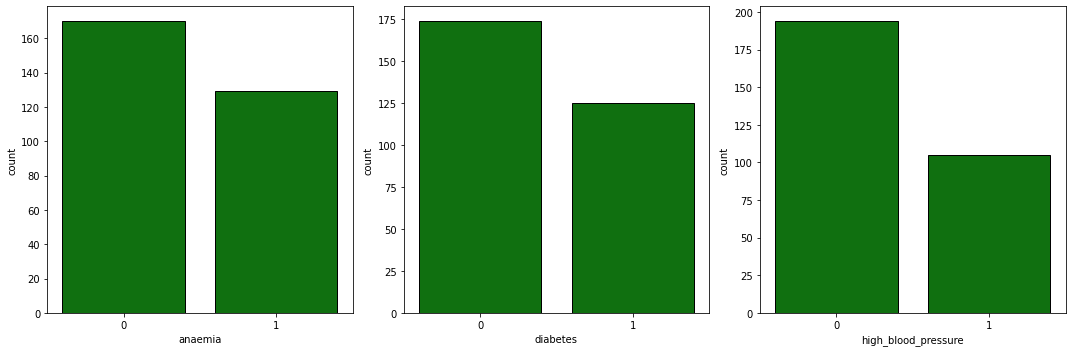

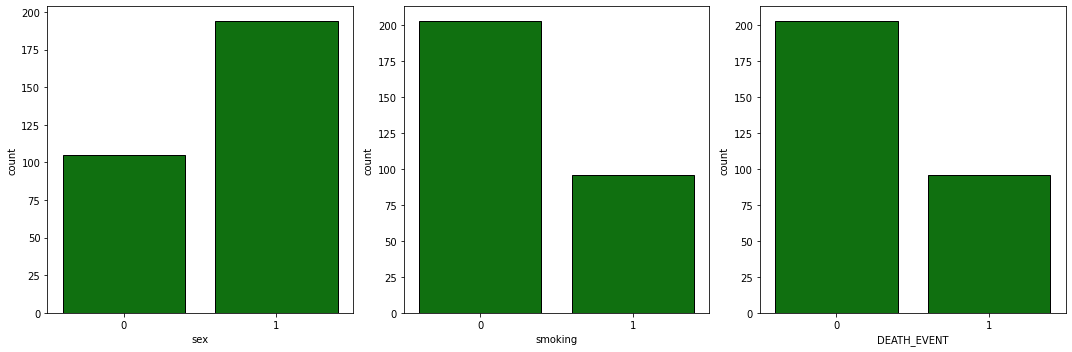

In [72]:
# individual count plot (categorical)
part = math.ceil(len(categoricals)/3)
awal = 0
for i in range(1, part+1):
  if i != part:
    akhir = 3*i
  else:
    akhir = len(categoricals)

  plt.figure(figsize=(15,5))
  k = 0

  for j in range(awal, akhir):
    k = k+1
    plt.subplot(1, 3, k)
    sns.countplot(df[categoricals[j]], color="green", edgecolor = "black", linewidth = 1)
    plt.tight_layout()
  
  awal = akhir

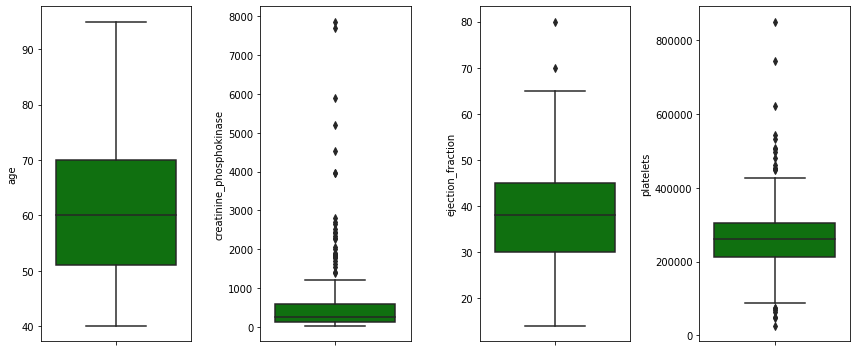

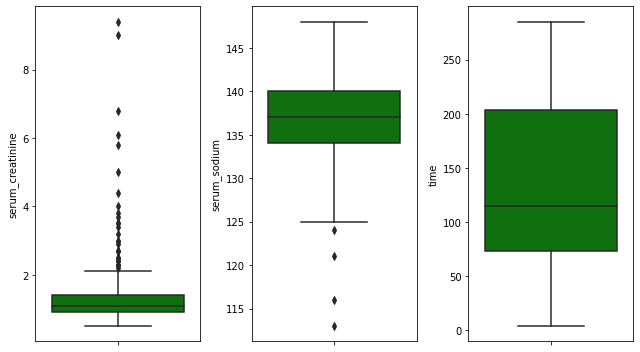

In [73]:
# individual boxplot (numeric)
part = math.ceil(len(numericals)/4)
awal = 0
for i in range(1, part+1):
  if i != part:
    akhir = 4*i
  else:
    akhir = len(numericals)

  plt.figure(figsize=(12,5))
  k = 0

  for j in range(awal, akhir):
    k = k+1
    plt.subplot(1, 4, k)
    sns.boxplot(y=df[numericals[j]], color="green", orient="v")
    plt.tight_layout()
  
  awal = akhir

In [74]:
lsUpper = []
lsLower = []
def removeOutliers(numericals):
    for i in range(len(numericals)):
        q1 = df[numericals[i]].quantile(0.25)
        q3 = df[numericals[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df.loc[(df[numericals[i]] <= minimum), numericals[i]] = minimum
        df.loc[(df[numericals[i]] >= maximum), numericals[i]] = maximum  
removeOutliers(numericals)

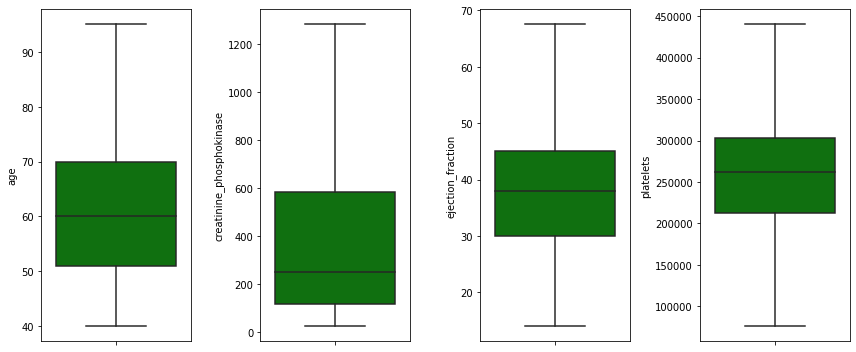

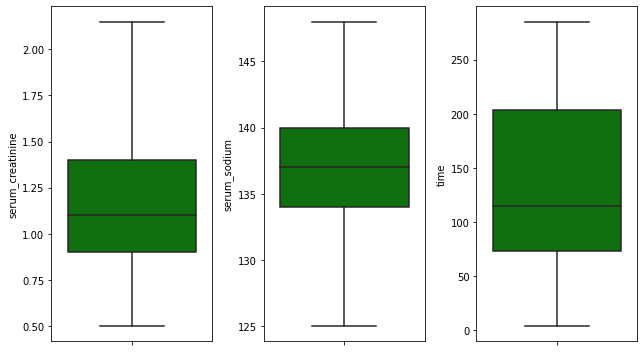

In [75]:
# individual boxplot (numeric)
part = math.ceil(len(numericals)/4)
awal = 0
for i in range(1, part+1):
  if i != part:
    akhir = 4*i
  else:
    akhir = len(numericals)

  plt.figure(figsize=(12,5))
  k = 0

  for j in range(awal, akhir):
    k = k+1
    plt.subplot(1, 4, k)
    sns.boxplot(y=df[numericals[j]], color="green", orient="v")
    plt.tight_layout()
  
  awal = akhir

### Mengecek Skewness

In [76]:
skewed   = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed, columns = ["Skewed"])
skewness

,Skewed
creatinine_phosphokinase,1.065222
serum_creatinine,0.900749
DEATH_EVENT,0.766479
smoking,0.766479
high_blood_pressure,0.623583
ejection_fraction,0.470551
age,0.420937
diabetes,0.332251
anaemia,0.276863
platelets,0.241257


> Terlihat bahwa dalam dataset creatine_phosphokinase dan serum_creatinine memiliki nilai skewed cukup tinggi diantara yang lain.

In [77]:
data_skew=["creatinine_phosphokinase","serum_creatinine"]

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


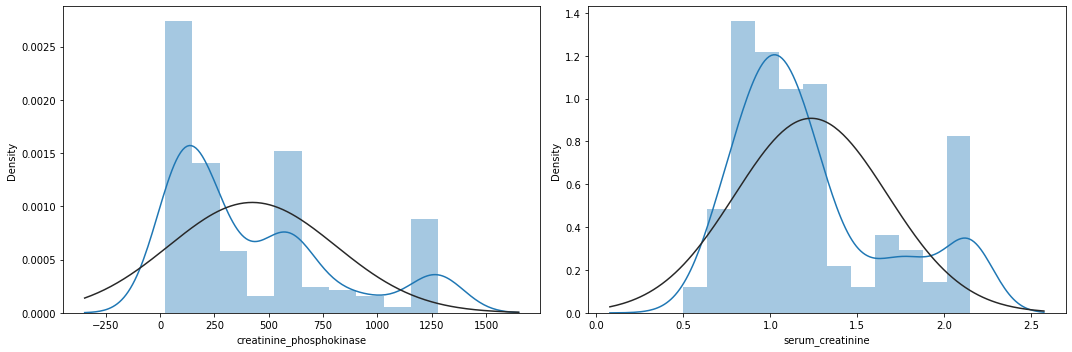

In [78]:
part = math.ceil(len(data_skew)/2)
awal = 0
for i in range(1, part+1):
  if i != part:
    akhir = 2*i
  else:
    akhir = len(data_skew)

  plt.figure(figsize=(15,5))
  k = 0

  for j in range(awal, akhir):
    k = k+1
    plt.subplot(1, 2, k)
    sns.distplot(df[data_skew[j]], fit = norm)
    plt.tight_layout()
  
  awal = akhir

In [79]:
df["creatinine_phosphokinase"], lam = boxcox(df["creatinine_phosphokinase"])
df["serum_creatinine"], lam = boxcox(df["serum_creatinine"])

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


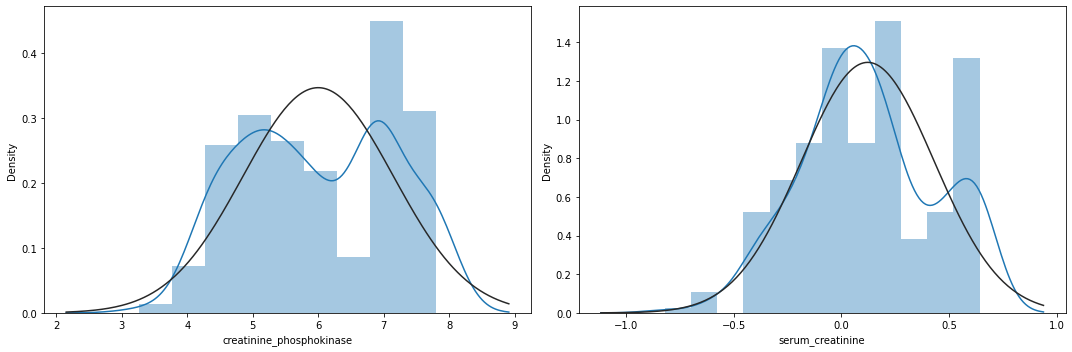

In [80]:
part = math.ceil(len(data_skew)/2)
awal = 0
for i in range(1, part+1):
  if i != part:
    akhir = 2*i
  else:
    akhir = len(data_skew)

  plt.figure(figsize=(15,5))
  k = 0

  for j in range(awal, akhir):
    k = k+1
    plt.subplot(1, 2, k)
    sns.distplot(df[data_skew[j]], fit = norm)
    plt.tight_layout()
  
  awal = akhir

In [81]:
skewed   = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed, columns = ["skewed"])
skewness

,skewed
DEATH_EVENT,0.766479
smoking,0.766479
high_blood_pressure,0.623583
ejection_fraction,0.470551
age,0.420937
diabetes,0.332251
anaemia,0.276863
platelets,0.241257
time,0.127161
serum_creatinine,0.030420


# Exploratory Data Analysis (EDA)

In [82]:
# meng-copy df dengan fitur sex dan death event ke dalam variabel baru
df_eda = df.copy()

# mengubah value 0 dan 1 (untuk visualisasi)
df_eda['DEATH_EVENT'].replace({0:'survived', 1: 'not survived'}, inplace=True)
df_eda['sex'].replace({0:'female', 1:'male'}, inplace=True)
df_eda['smoking'].replace({0:'no', 1:'yes'}, inplace=True)
df_eda['diabetes'].replace({0:'no', 1:'yes'}, inplace=True)
df_eda['anaemia'].replace({0:'no', 1:'yes'}, inplace=True)
df_eda['high_blood_pressure'].replace({0:'no', 1:'yes'}, inplace=True)

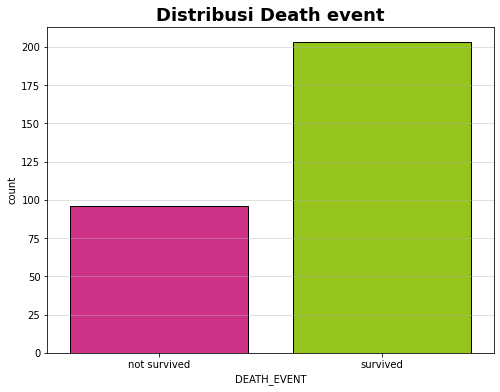

In [83]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='DEATH_EVENT', data = df_eda, palette = ['#e91989', "#a1e000"], edgecolor = "black", linewidth =1)

plt.show()

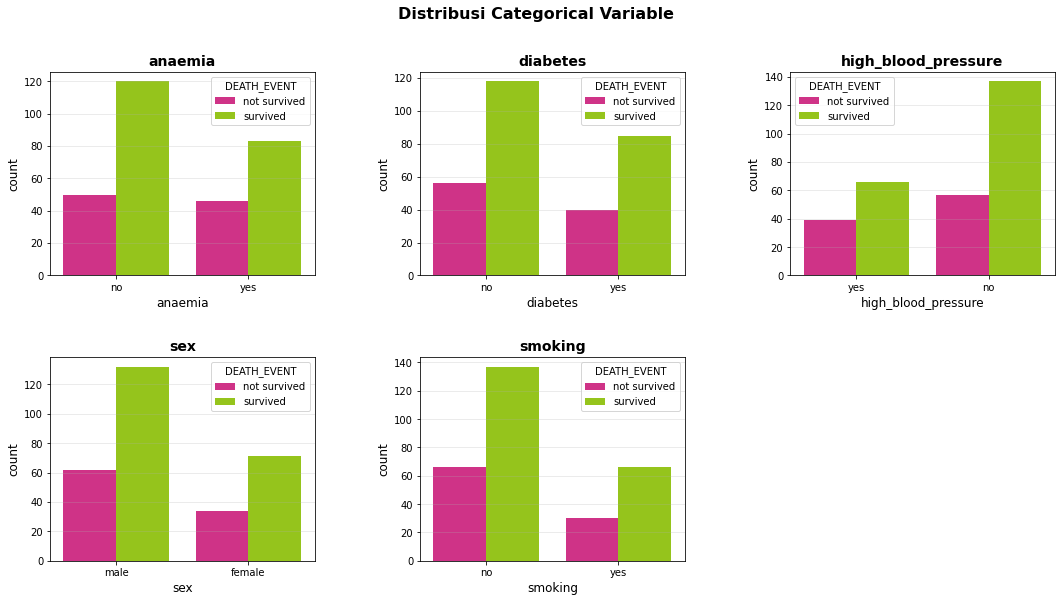

In [84]:
categoricals1 = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]

fig = plt.figure(figsize=(18, 9))
for i, var in enumerate(categoricals1):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    sns.countplot(data= df_eda, x = var, hue="DEATH_EVENT", palette = ['#e91989', "#a1e000"])

fig.suptitle('Distribusi Categorical Variable', fontsize=16, fontweight='bold');

In [85]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.088770,-0.101012,0.066056,0.093289,-0.034159,0.264939,-0.052425,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.215563,-0.012729,0.034259,0.038182,-0.029060,-0.009069,0.048286,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.088770,-0.215563,1.000000,0.041635,-0.074005,-0.072321,0.003849,-0.054158,0.006865,0.015954,-0.033104,0.119821,0.021085
diabetes,-0.101012,-0.012729,0.041635,1.000000,-0.001267,-0.012732,0.070419,0.005884,-0.071714,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.066056,0.034259,-0.074005,-0.001267,1.000000,0.026419,0.068474,-0.165654,0.181716,-0.144435,-0.065217,0.044765,-0.270611
high_blood_pressure,0.093289,0.038182,-0.072321,-0.012732,0.026419,1.000000,0.073361,-0.082282,0.026167,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.034159,-0.029060,0.003849,0.070419,0.068474,0.073361,1.000000,-0.057856,0.054313,-0.124212,0.012990,-0.003807,-0.044132
serum_creatinine,0.264939,-0.009069,-0.054158,0.005884,-0.165654,-0.082282,-0.057856,1.000000,-0.263340,0.043781,-0.041944,-0.157832,0.373510
serum_sodium,-0.052425,0.048286,0.006865,-0.071714,0.181716,0.026167,0.054313,-0.263340,1.000000,-0.038217,0.011637,0.085066,-0.201320
sex,0.065430,-0.094769,0.015954,-0.157730,-0.144435,-0.104615,-0.124212,0.043781,-0.038217,1.000000,0.445892,-0.015608,-0.004316


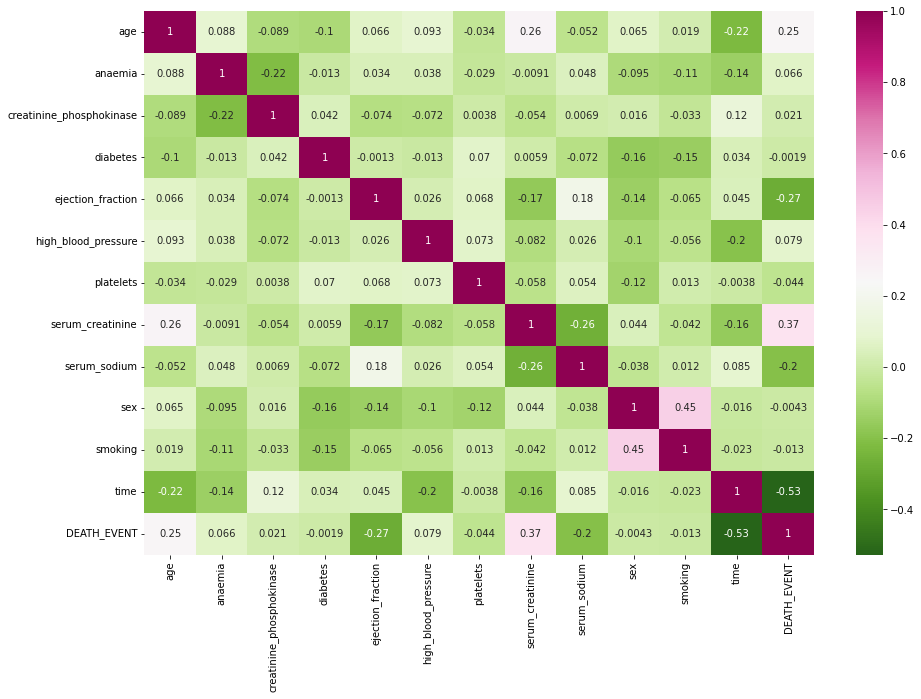

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="PiYG_r", fmt='.2g');

# Data Preprocessing

In [87]:
de = [i for i in df.columns if i != 'DEATH_EVENT']

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[de] = scaler.fit_transform(df[de])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,-0.871105,0.764809,-0.847579,-1.545801,1.359272,0.071750,1.399699,-1.649172,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,1.571554,-0.847579,-0.002867,-0.735688,0.051564,-0.096242,-0.175024,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.614109,-0.847579,-1.545801,-0.735688,-1.194509,0.402525,-1.894864,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.882029,-0.847579,-1.545801,-0.735688,-0.604408,1.399699,0.070667,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.524206,1.179830,-1.545801,-0.735688,0.833964,1.687858,-2.877629,-1.359272,-0.687682,-1.577879,1


# Model

In [89]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [90]:
print("Before Smote")
y.value_counts()

Before Smote


0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [91]:
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x, y)

In [92]:
print("After Smote")
y_sm.value_counts()

After Smote


1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, stratify = y_sm, test_size=0.3, random_state=5)

# Random Forest Classifier

In [94]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

pred1  = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

Accuracy Score: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.81      0.89      0.84        61

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



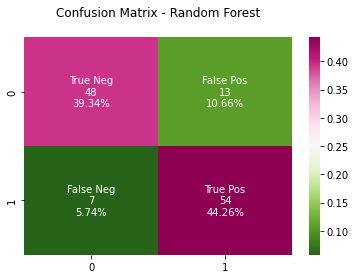

In [95]:
cm_rf              = confusion_matrix(y_test, pred1)
group_names        = ['True Neg','False Pos','False Neg','True Pos']
group_counts       = ['{0:0.0f}'.format(value) for value in cm_rf.flatten()]
group_percentages  = ['{0:.2%}'.format(value) for value in cm_rf.flatten()/np.sum(cm_rf)]
labels             = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels             = np.asarray(labels).reshape(2,2)
ax                 = sns.heatmap(cm_rf/np.sum(cm_rf), annot=labels, fmt='', cmap='PiYG_r')
ax.set_title('Confusion Matrix - Random Forest\n');

plt.show()

# XGB Classifier

In [96]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred2  = xgb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.81      0.89      0.84        61

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



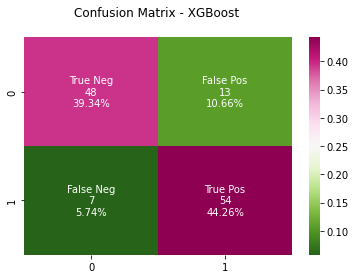

In [97]:
cm_xb              = confusion_matrix(y_test, pred2)
group_names        = ['True Neg','False Pos','False Neg','True Pos']
group_counts       = ['{0:0.0f}'.format(value) for value in cm_xb.flatten()]
group_percentages  = ['{0:.2%}'.format(value) for value in cm_xb.flatten()/np.sum(cm_xb)]
labels             = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels             = np.asarray(labels).reshape(2,2)
ax                 = sns.heatmap(cm_xb/np.sum(cm_xb), annot=labels, fmt='', cmap='PiYG_r')
ax.set_title('Confusion Matrix - XGBoost \n');

plt.show()

In [98]:
dt_acc1 = accuracy_score(y_test, pred1)
dt_acc2 = accuracy_score(y_test, pred2)

print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* dt_acc1))
print("Accuracy of XGB Classifier is           : ", "{:.2f}%".format(100* dt_acc2))

Accuracy of Random Forest Classifier is :  83.61%
Accuracy of XGB Classifier is           :  83.61%


In [99]:
# kesimpulan akurasi
akurasi = {"Model": ["Random Forest", "XGBoost"],
"Accuracy"   : [accuracy_score(y_test, pred1)*100, accuracy_score(y_test, pred2)*100], 
"Precession" : [precision_score(y_test, pred1)*100, precision_score(y_test, pred2)*100],
"Recall"     : [recall_score(y_test, pred1)*100, recall_score(y_test, pred2)*100],
"F1-Score"   : [f1_score(y_test, pred1)*100, f1_score(y_test, pred2)*100]
          }

tabel_akurasi = pd.DataFrame(akurasi).sort_values('Precession')
print('Ringkasan Evaluasi Model')
display(tabel_akurasi)

Ringkasan Evaluasi Model


,Model,Accuracy,Precession,Recall,F1-Score
0,Random Forest,83.606557,80.597015,88.52459,84.375
1,XGBoost,83.606557,80.597015,88.52459,84.375


> Telrihat bahwa XGBoost mempunyai nilai accuracy sebesar 83.61%, Precession 80.59, Recall 88.52, dan F1-Score 84.37. Sedangkan pada Random Forest dengan nilai akurasi 85.61%, Precession 82.08, Recall 90.16%, F1-Score 85.93. Nilai akurasi Random Forest lebih tinggi dari pada XGBoost.

In [100]:
pickle.dump(random_forest , open('model_rf.pkl','wb'))

> Link Deployment tersedia dalam github